In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def generate_heatmap_and_detect(image_path, output_path):
    # Read image
    img = cv2.imread(image_path)
    orig = img.copy()
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Simulated heatmap (blurring and inversion for intensity contrast)
    blur = cv2.GaussianBlur(img_gray, (21, 21), 0)
    heatmap = cv2.applyColorMap(255 - blur, cv2.COLORMAP_JET)

    # Threshold for "hot" regions
    _, thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY_INV)

    # Find contours representing infected cells
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    infected_count = 0
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 100:  # filter small artifacts
            infected_count += 1
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(heatmap, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Predict infection stage
    if infected_count <= 3:
        stage = 'Low'
    elif infected_count <= 7:
        stage = 'Medium'
    else:
        stage = 'High'

    # Save output image
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    cv2.imwrite(output_path, heatmap)

    return {
        "infected_cell_count": infected_count,
        "predicted_stage": stage,
        "output_path": output_path
    }


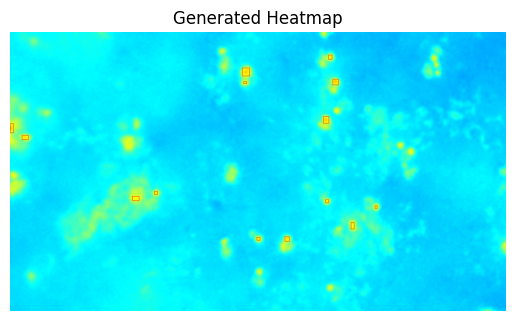

Infected Cell Count: 14
Predicted Stage: High
Saved Heatmap Image at: /Users/rajesh/Desktop/CNN-Predictor-for-Malaria_Cells-LIME-CAM-main/testing/result.jpg


In [3]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import the function
# from malaria_stage_detector import generate_heatmap_and_detect

image_path = "/Users/rajesh/Desktop/CNN-Predictor-for-Malaria_Cells-LIME-CAM-main/testing/Image1002.jpg"
output_path = '/Users/rajesh/Desktop/CNN-Predictor-for-Malaria_Cells-LIME-CAM-main/testing/result.jpg'

# image_path = "/Users/rajesh/Downloads/inp.jpg"
# output_path = "/Users/rajesh/Downloads/out.jpg"

# Run the heatmap generation and prediction
result = generate_heatmap_and_detect(image_path, output_path)

# Display the heatmap image
img = mpimg.imread(result["output_path"])
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title('Generated Heatmap')
plt.show()

# Print results
print("Infected Cell Count:", result["infected_cell_count"])
print("Predicted Stage:", result["predicted_stage"])
print("Saved Heatmap Image at:", result["output_path"])
